 ### Face Recognition with images

In [1]:
import cv2  

In [39]:

img=cv2.imread('download.jpg')

In [22]:
import matplotlib.pyplot as plt 

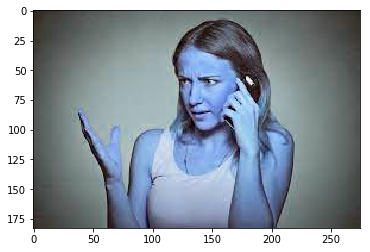

In [40]:
plt.imshow(img)


In [2]:
from deepface import DeepFace


ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [41]:
obj = DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.16s/it]


In [42]:
obj

{'age': 30,
 'dominant_emotion': 'angry',
 'dominant_race': 'white',
 'emotion': {'angry': 61.26742362976074,
  'disgust': 1.1437006008918615e-06,
  'fear': 0.06510637467727065,
  'happy': 0.003444803587626666,
  'neutral': 0.34466739743947983,
  'sad': 38.319358229637146,
  'surprise': 2.663711384798262e-06},
 'gender': 'Man',
 'race': {'asian': 5.500579252839088,
  'black': 0.6933250464498997,
  'indian': 4.10173237323761,
  'latino hispanic': 20.304062962532043,
  'middle eastern': 19.025160372257233,
  'white': 50.37513971328735},
 'region': {'h': 66, 'w': 45, 'x': 122, 'y': 33}}

In [43]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [44]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces=faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces: 
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [45]:
font= cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img , 
           obj['dominant_emotion'],
           (0,50),
           font,2,
           (0,0,255),
           2,
           cv2.LINE_8);

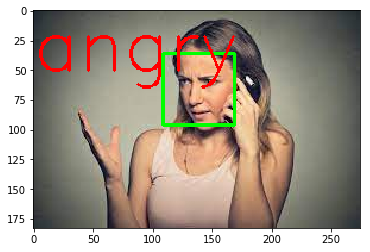

In [46]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

### Face recognition (VIDEO)

In [ ]:
cap=cv2.VideoCapture(1)

#check the webcam is opened correctly 

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened(): 
    raise IOError('Cannot open Webcam')
    
while True : 
    ret,frame=cap.read() 
    result = DeepFace.analyze(frame, actions=['emotion'])
    
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces=faceCascade.detectMultiScale(gray,1.1,4)

    for(x,y,w,h) in faces: 
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font= cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(img , 
           obj['dominant_emotion'],
           (0,50),
           font,2,
           (0,0,255),
           2,
           cv2.LINE_4)
    cv2.imshow('Original video',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break 
    
cap.release()
cv2.destroyAllWindows()
    